# Figures for presentation

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify
import pandas as pd
from matplotlib import cm, colors
import glasbey

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import contextily as cx
from momepy.datasets import get_path
from matplotlib_scalebar.scalebar import ScaleBar
import geopandas as gpd
import shapely
import mapclassify
from matplotlib.transforms import Bbox
from matplotlib.lines import Line2D

from scipy.cluster.hierarchy import dendrogram, fcluster, set_link_color_palette

In [2]:
from matplotlib import rcParams

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Lato"]

In [25]:
centres_df = pd.DataFrame(((50.08873, 14.41810), ), columns=['y', 'x'])
centres_df = gpd.GeoSeries(gpd.points_from_xy(centres_df['x'], centres_df['y'], crs='epsg:4236')).to_crs(epsg=3035)

In [4]:
prague = gpd.read_parquet('/data/uscuni-ulce/processed_data/chars/buildings_chars_69333.parquet')
prague = prague[prague.within(centres_df.buffer(3_500).iloc[0])]

In [5]:
primary = pd.read_parquet('/data/uscuni-ulce/data_product/data/primary_chars_69333.parquet')

In [6]:
primary

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbCor,ssbSqu,ssbERI,ssbElo,ssbCCM,ssbCCD,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,licBAD,misBAD,midBAD
-4242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,208.790015,209.215673,NaN,NaN
-4241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,201.959933,349.549459,NaN,NaN
-4240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,191.996473,343.889482,0.000000,NaN
-4239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,199.266220,405.939270,NaN,77.972974
-4238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.400397,334.250353,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446822,18.808939,18.500639,0.0,0.497522,4.0,0.281908,1.000161,0.483786,3.462293,0.006698,...,0.411406,1.002327,0.448064,32.928188,4.448825,4.448825,0.229979,375.277537,262.586086,90.207646
446823,20.175570,18.761721,0.0,0.538543,4.0,0.075115,0.999742,0.553808,3.451425,0.001870,...,0.188995,0.996211,0.229472,34.127736,2.638659,2.638659,508.502435,742.332821,231.441900,274.249781
446824,13.866140,14.948105,0.0,0.625960,4.0,0.156247,0.999969,0.845145,2.651838,0.003801,...,0.852422,1.010727,0.645340,5.510775,0.988196,0.988196,163.211969,405.444622,501.412662,594.756223
446825,33.743731,29.450456,0.0,0.284469,4.0,1.529599,0.972651,0.261972,6.110411,0.157801,...,0.274174,0.980486,0.299731,12.489400,1.220809,1.220809,116.037844,98.813961,163.218683,99.352656


In [7]:
prague['micBAD'] = primary.micBAD
prague['lcdMes'] = primary.lcdMes
prague['sisBpM'] = primary.sisBpM

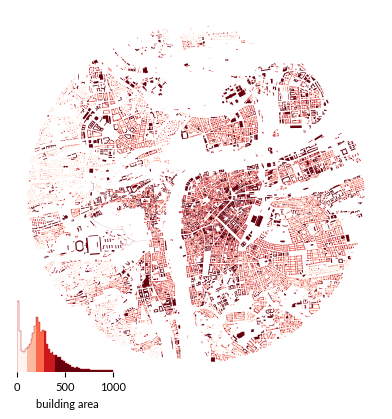

In [21]:
sdbare_legend = mapclassify.classify(
    prague.sdbAre[prague.sdbAre < 1000], "quantiles", k=5
)

ax = prague.plot('sdbAre', scheme='userdefined', cmap='Reds', classification_kwds=dict(bins=sdbare_legend.bins))
sdbare_ax = sdbare_legend.plot_legendgram(ax=ax, cmap='Reds',  frameon=False)
sdbare_ax.hist(
    sdbare_legend.y, bins=50, color=cm.Reds(0.8), histtype="step", linewidth=0.3
)
sdbare_ax.tick_params(axis="x", which="both", labelsize=8)
sdbare_ax.set_xlabel("building area", fontsize=8)
sdbare_ax.set_xlim(0, sdbare_ax.get_xlim()[1])
sdbare_ax.spines["top"].set_visible(False)
sdbare_ax.spines["right"].set_visible(False)
sdbare_ax.spines["left"].set_visible(False)
sdbare_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


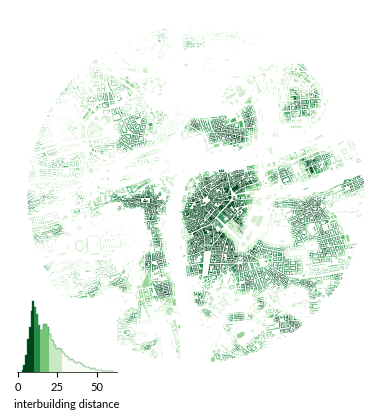

In [ ]:
ltbibd_legend = mapclassify.classify(
    prague.ltbIBD[prague.ltbIBD < 60], "quantiles", k=5
)

ax = prague.plot('ltbIBD', scheme='userdefined', cmap='Greens_r', classification_kwds=dict(bins=ltbibd_legend.bins))
ltbibd_ax = ltbibd_legend.plot_legendgram(ax=ax, cmap="Greens_r", frameon=True)
ltbibd_ax.hist(
    ltbibd_legend.y, bins=50, color=cm.Greens(0.8), histtype="step", linewidth=0.3
)
ltbibd_ax.tick_params(axis="x", which="both", labelsize=8)
ltbibd_ax.set_xlabel("interbuilding distance", fontsize=8)
ltbibd_ax.spines["top"].set_visible(False)
ltbibd_ax.spines["right"].set_visible(False)
ltbibd_ax.spines["left"].set_visible(False)
ltbibd_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


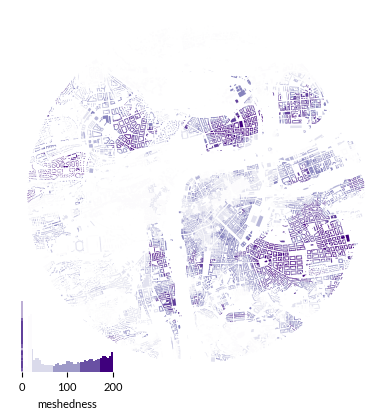

In [ ]:
lcdmes_legend = mapclassify.classify(
    prague.lcdMes[(prague.lcdMes > 0) & (prague.lcdMes < 0.25)],
    "quantiles",
    k=5,
)

ax = prague.plot('lcdMes', scheme='userdefined', cmap='Purples', classification_kwds=dict(bins=lcdmes_legend.bins))
lcdmes_ax = sdbare_legend.plot_legendgram(ax=ax, cmap='Purples',  frameon=False)
lcdmes_ax.hist(
    lcdmes_legend.y, bins=50, color=cm.Purples(0.8), histtype="step", linewidth=0.3
)
lcdmes_ax.tick_params(axis="x", which="both", labelsize=8)
lcdmes_ax.set_xlabel("meshedness", fontsize=8)
lcdmes_ax.spines["top"].set_visible(False)
lcdmes_ax.spines["right"].set_visible(False)
lcdmes_ax.spines["left"].set_visible(False)
lcdmes_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


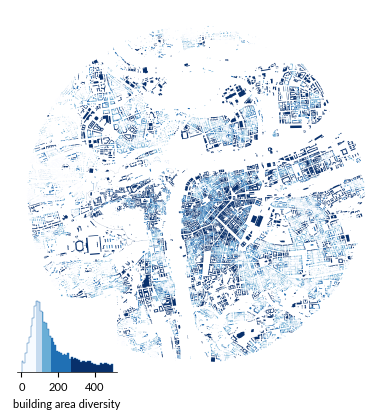

In [23]:
micbad_legend = mapclassify.classify(
    prague.micBAD[prague.micBAD < 500], "quantiles", k=5
)

ax = prague.plot('micBAD', scheme='userdefined', cmap='Blues', classification_kwds=dict(bins=micbad_legend.bins))
micbad_ax = micbad_legend.plot_legendgram(ax=ax, cmap="Blues", frameon=True)
micbad_ax.hist(
    micbad_legend.y, bins=50, color=cm.Blues(0.8), histtype="step", linewidth=0.3
)
micbad_ax.tick_params(axis="x", which="both", labelsize=8)
micbad_ax.set_xlabel("building area diversity", fontsize=8)
micbad_ax.spines["top"].set_visible(False)
micbad_ax.spines["right"].set_visible(False)
micbad_ax.spines["left"].set_visible(False)
micbad_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


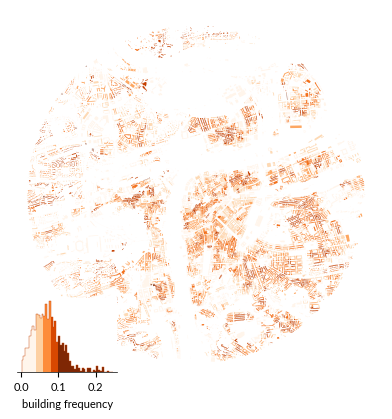

In [13]:
sisbpm_legend = mapclassify.classify(
    prague.sisBpM[prague.sisBpM < 0.25], "quantiles", k=5
)

ax = prague.plot('sisBpM', scheme='userdefined', cmap='Oranges', classification_kwds=dict(bins=sisbpm_legend.bins))
sisbpm_ax = sisbpm_legend.plot_legendgram(ax=ax, cmap="Oranges", frameon=True)
sisbpm_ax.hist(
    sisbpm_legend.y, bins=50, color=cm.Oranges(0.8), histtype="step", linewidth=0.3
)
sisbpm_ax.tick_params(axis="x", which="both", labelsize=8)
sisbpm_ax.set_xlabel("building frequency", fontsize=8)
sisbpm_ax.spines["top"].set_visible(False)
sisbpm_ax.spines["right"].set_visible(False)
sisbpm_ax.spines["left"].set_visible(False)
sisbpm_ax.spines["bottom"].set_linewidth(0.5)
ax.set_axis_off()


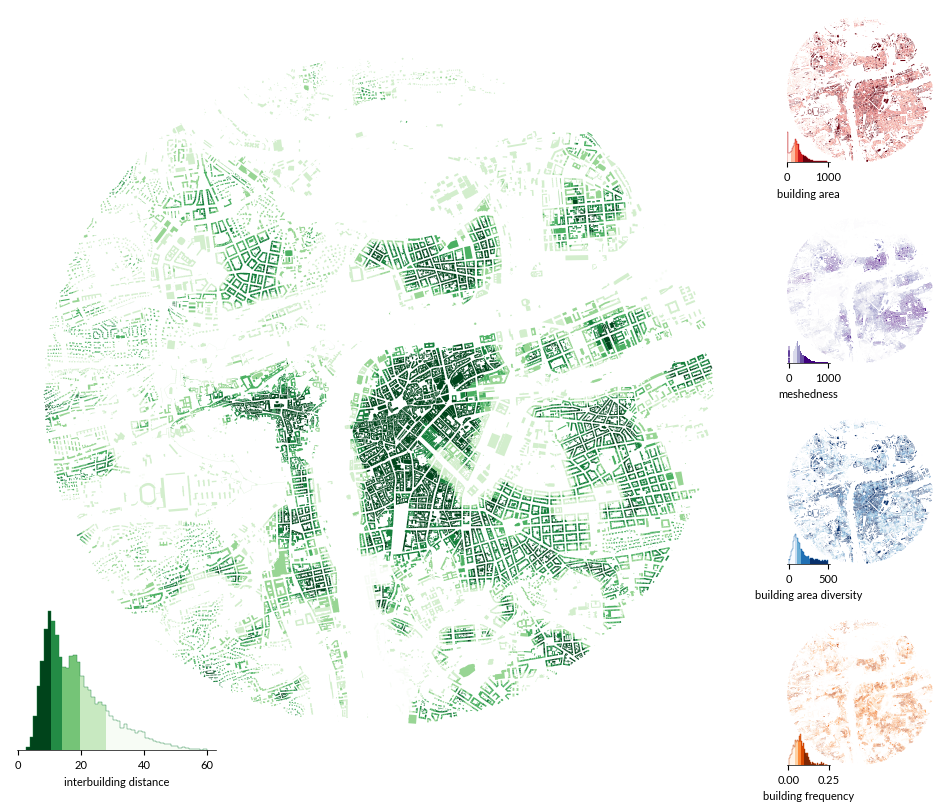

In [ ]:
f = plt.figure(figsize=(12, 10))

axs = f.subplot_mosaic(
    """
    AAAAB
    AAAAC
    AAAAD
    AAAAE
    """)

ltbibd_legend = mapclassify.classify(
    prague.ltbIBD[prague.ltbIBD < 60], "quantiles", k=5
)

prague.plot('ltbIBD', scheme='userdefined', cmap='Greens_r', classification_kwds=dict(bins=ltbibd_legend.bins), ax=axs['A'])
ltbibd_ax = ltbibd_legend.plot_legendgram(ax=axs['A'], cmap="Greens_r", frameon=True)
ltbibd_ax.hist(
    ltbibd_legend.y, bins=50, color=cm.Greens(0.8), histtype="step", linewidth=0.3
)
ltbibd_ax.tick_params(axis="x", which="both", labelsize=8)
ltbibd_ax.set_xlabel("interbuilding distance", fontsize=8)
ltbibd_ax.spines["top"].set_visible(False)
ltbibd_ax.spines["right"].set_visible(False)
ltbibd_ax.spines["left"].set_visible(False)
ltbibd_ax.spines["bottom"].set_linewidth(0.5)
ltbibd_ax.set_facecolor('none')


sdbare_legend = mapclassify.classify(
    prague.sdbAre[prague.sdbAre < 1000], "quantiles", k=5
)

prague.plot('sdbAre', scheme='userdefined', cmap='Reds', classification_kwds=dict(bins=sdbare_legend.bins), ax=axs['B'])
sdbare_ax = sdbare_legend.plot_legendgram(ax=axs['B'], cmap='Reds',  frameon=True)
sdbare_ax.hist(
    sdbare_legend.y, bins=50, color=cm.Reds(0.8), histtype="step", linewidth=0.3
)
sdbare_ax.tick_params(axis="x", which="both", labelsize=8)
sdbare_ax.set_xlabel("building area", fontsize=8)
sdbare_ax.set_xlim(0, sdbare_ax.get_xlim()[1])
sdbare_ax.spines["top"].set_visible(False)
sdbare_ax.spines["right"].set_visible(False)
sdbare_ax.spines["left"].set_visible(False)
sdbare_ax.spines["bottom"].set_linewidth(0.5)
sdbare_ax.set_facecolor('none')

lcdmes_legend = mapclassify.classify(
    prague.lcdMes[(prague.lcdMes > 0) & (prague.lcdMes < 0.25)],
    "quantiles",
    k=5,
)

prague.plot('lcdMes', scheme='userdefined', cmap='Purples', classification_kwds=dict(bins=lcdmes_legend.bins), ax=axs['C'])
lcdmes_ax = sdbare_legend.plot_legendgram(ax=axs['C'], cmap='Purples',  frameon=True)
lcdmes_ax.hist(
    lcdmes_legend.y, bins=50, color=cm.Purples(0.8), histtype="step", linewidth=0.3
)
lcdmes_ax.tick_params(axis="x", which="both", labelsize=8)
lcdmes_ax.set_xlabel("meshedness", fontsize=8)
lcdmes_ax.spines["top"].set_visible(False)
lcdmes_ax.spines["right"].set_visible(False)
lcdmes_ax.spines["left"].set_visible(False)
lcdmes_ax.spines["bottom"].set_linewidth(0.5)
lcdmes_ax.set_facecolor('none')


micbad_legend = mapclassify.classify(
    prague.micBAD[prague.micBAD < 500], "quantiles", k=5
)

prague.plot('micBAD', scheme='userdefined', cmap='Blues', classification_kwds=dict(bins=micbad_legend.bins), ax=axs['D'])
micbad_ax = micbad_legend.plot_legendgram(ax=axs['D'], cmap="Blues", frameon=True)
micbad_ax.hist(
    micbad_legend.y, bins=50, color=cm.Blues(0.8), histtype="step", linewidth=0.3
)
micbad_ax.tick_params(axis="x", which="both", labelsize=8)
micbad_ax.set_xlabel("building area diversity", fontsize=8)
micbad_ax.spines["top"].set_visible(False)
micbad_ax.spines["right"].set_visible(False)
micbad_ax.spines["left"].set_visible(False)
micbad_ax.spines["bottom"].set_linewidth(0.5)
micbad_ax.set_facecolor('none')

sisbpm_legend = mapclassify.classify(
    prague.sisBpM[prague.sisBpM < 0.25], "quantiles", k=5
)
prague.plot('sisBpM', scheme='userdefined', cmap='Oranges', classification_kwds=dict(bins=sisbpm_legend.bins), ax=axs['E'])
sisbpm_ax = sisbpm_legend.plot_legendgram(ax=axs['E'], cmap="Oranges", frameon=True)
sisbpm_ax.hist(
    sisbpm_legend.y, bins=50, color=cm.Oranges(0.8), histtype="step", linewidth=0.3
)
sisbpm_ax.tick_params(axis="x", which="both", labelsize=8)
sisbpm_ax.set_xlabel("building frequency", fontsize=8)
sisbpm_ax.spines["top"].set_visible(False)
sisbpm_ax.spines["right"].set_visible(False)
sisbpm_ax.spines["left"].set_visible(False)
sisbpm_ax.spines["bottom"].set_linewidth(0.5)
sisbpm_ax.set_facecolor('none')

for ax in axs.values():
    ax.set_axis_off()
plt.savefig('../data/characters.png', bbox_inches='tight', dpi=300)

In [6]:
clusters = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_69333_v10.pq')

In [7]:
clusters

,currentUse,buildingNature,heightAboveGround,iid,geometry,label,morph,final,final_without_noise
0,None,None,NaN,80677517,"POLYGON ((4616718.204 3026081.581, 4616720.974...",0,69333_0_-1,-1,36
1,None,None,NaN,80677518,"POLYGON ((4617480.926 3025927.323, 4617486.098...",1775,69333_1_0,49,49
2,None,None,NaN,80677519,"POLYGON ((4617331.885 3025855.863, 4617331.941...",1775,69333_1_0,49,49
3,None,None,NaN,80677520,"POLYGON ((4617495.899 3025921.454, 4617499.35 ...",1775,69333_1_0,49,49
4,None,None,NaN,80677521,"POLYGON ((4617561.862 3026075.057, 4617564.522...",1775,69333_1_0,49,49
...,...,...,...,...,...,...,...,...,...
446822,None,None,NaN,82307932,"POLYGON ((4643444.536 3006455.727, 4643447.422...",5749,69333_849_640,-1,101
446823,None,None,NaN,82308166,"POLYGON ((4640285.807 3000016.398, 4640291.15 ...",5146,69333_849_-1,-1,103
446824,None,None,NaN,82308213,"POLYGON ((4644217.544 3009263.369, 4644217.737...",5578,69333_849_487,4,4
446825,None,None,NaN,82308225,"POLYGON ((4637968.015 3010358.876, 4637978.019...",5602,69333_849_508,47,47


In [8]:
prague['morph'] = clusters['morph']

In [9]:
prague['morph'].nunique()

173

In [10]:
our_cmap = ["#4069BC",
          "#7CBAE4",
          "#E69C63",
          "#eec1d5",
          "#E0665F",
          "#ECBF43",
          "#b2cd32",
          "#1F943E",
]

In [11]:
cmap = colors.ListedColormap(glasbey.extend_palette(our_cmap, palette_size=prague['morph'].nunique()))

In [12]:
prague

,currentUse,buildingNature,heightAboveGround,iid,geometry,ssbCCo,ssbCor,ssbSqu,ssbCCM,ssbCCD,...,mibSCo,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbCeA,nID,stbSAl,nodeID,morph
109732,None,None,NaN,82155157,"POLYGON ((4635794.224 3008043.995, 4635796.719...",0.626068,4,0.198624,11.030273,0.013655,...,7.689366,0.500000,0.151247,7.492466,11.266421,0.034327,43248.0,0.097001,47192.0,69333_849_323
109733,None,None,NaN,82155158,"POLYGON ((4636976.776 3008286.76, 4636984.948 ...",0.485121,6,0.556760,8.989720,3.126901,...,6.969268,0.142857,0.558647,3.625321,8.022440,0.505091,25447.0,0.506420,32496.0,69333_849_12
109734,None,None,NaN,82155159,"POLYGON ((4637328.656 3008273.54, 4637344.196 ...",0.619299,5,18.197611,10.364995,0.377533,...,7.157216,0.285714,2.563176,11.125323,10.597585,0.221038,15119.0,0.015656,20966.0,69333_849_13
109735,None,None,NaN,82155160,"POLYGON ((4636918.245 3008194.636, 4636921.853...",0.615835,8,0.188484,9.761327,1.316634,...,7.208458,0.666667,0.197238,5.799055,22.108986,3.960724,25443.0,2.036518,32493.0,69333_849_12
109736,None,None,NaN,82155161,"POLYGON ((4635212.693 3009449.013, 4635219.388...",0.448896,8,0.983832,10.822149,3.549874,...,4.922710,0.888889,3.727045,40.050308,28.350285,7.188089,42166.0,16.551898,1122.0,69333_849_313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446775,None,None,NaN,82306837,"POLYGON ((4639262.87 3009485.797, 4639267.603 ...",0.483487,4,0.236169,3.054774,0.005463,...,2.882281,0.400000,0.929643,5.931554,11.935902,0.068765,25510.0,3.419873,3547.0,69333_849_733
446777,None,None,NaN,82306876,"POLYGON ((4634658.119 3005743.345, 4634663.755...",0.312933,6,30.000000,12.396743,1.235893,...,2.902958,1.000000,0.208658,21.943657,62.262728,6.214218,7306.0,28.881713,10430.0,69333_849_707
446798,None,None,NaN,82307122,"POLYGON ((4639255.884 3009496.786, 4639260.619...",0.489736,4,1.852247,3.151162,0.034349,...,2.882281,0.500000,1.466998,4.250665,12.234323,0.740350,25510.0,2.156138,3547.0,69333_849_733
446812,None,None,NaN,82307555,"POLYGON ((4639159.458 3009582.766, 4639162.616...",0.490291,4,0.117536,3.171233,0.002973,...,2.882281,0.600000,2.086207,4.871154,19.290708,0.110042,25510.0,1.605165,32550.0,69333_849_733


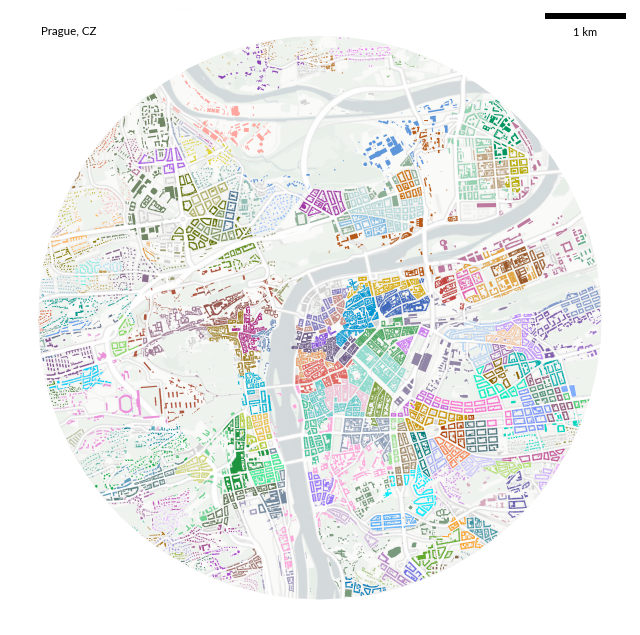

In [36]:
noise = prague.morph.str.endswith('-1')

ax = prague[~noise].plot('morph', cmap=cmap, figsize=(8, 8), linewidth=.1)
prague[noise].plot(ax=ax, color='lightgray')

cx.add_basemap(ax, crs=prague.crs, source=cx.providers.CartoDB.PositronNoLabels.build_url(scale_factor="@2x",), attribution='')
axis_box = shapely.box(ax.get_xlim()[0], ax.get_ylim()[0], ax.get_xlim()[1], ax.get_ylim()[1])
axis_waste = axis_box.difference(centres_df.iloc[0].buffer(3_500))
gpd.GeoSeries([axis_waste], crs=prague.crs).plot(ax=ax, color='w')

ax.add_artist(ScaleBar(1, location="upper right", frameon=False, font_properties={"size": 8}))
ax.set_axis_off()
ax.text(0.05, .96, 'Prague, CZ', size='small', transform=ax.transAxes)
plt.savefig('../data/morphotopes.png', bbox_inches='tight', dpi=300)

In [65]:
v = "v10"

In [66]:
linkage_matrix = np.load(
    f"/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy"
)

Code for circular dendrogram.

In [67]:
lower_cut = 10  # the lowest level shown in tree - matched to labels in pmtiles
higher_cut = 1000  # level at which colors are assigned

In [68]:
def smoothsegment(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])


def smoothline(seg, Nsmooth=100):
    return np.concatenate([[seg[0]], np.linspace(seg[1], seg[2], Nsmooth), [seg[3]]])

In [69]:
low = fcluster(linkage_matrix, lower_cut, criterion="distance")
high = fcluster(linkage_matrix, higher_cut, criterion="distance")

In [70]:
colors = [
    "#4069BC",
    "#7CBAE4",
    "#E69C63",
    "#eec1d5",
    "#E0665F",
    "#ECBF43",
    "#b2cd32",
    "#1F943E",
]
set_link_color_palette(colors)


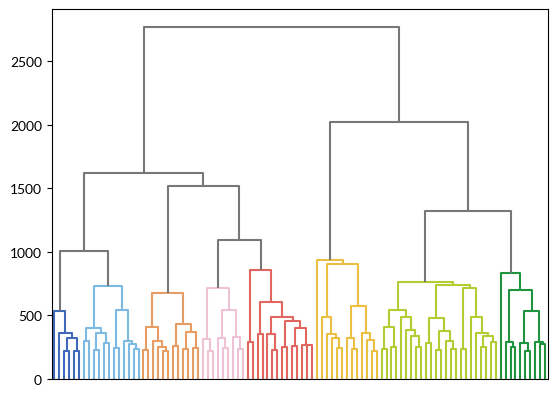

In [83]:
d = dendrogram(
    linkage_matrix,
    no_plot=False,
    truncate_mode='lastp',
    p=100,
    color_threshold=higher_cut,
    no_labels=True,
    above_threshold_color="#777",
)

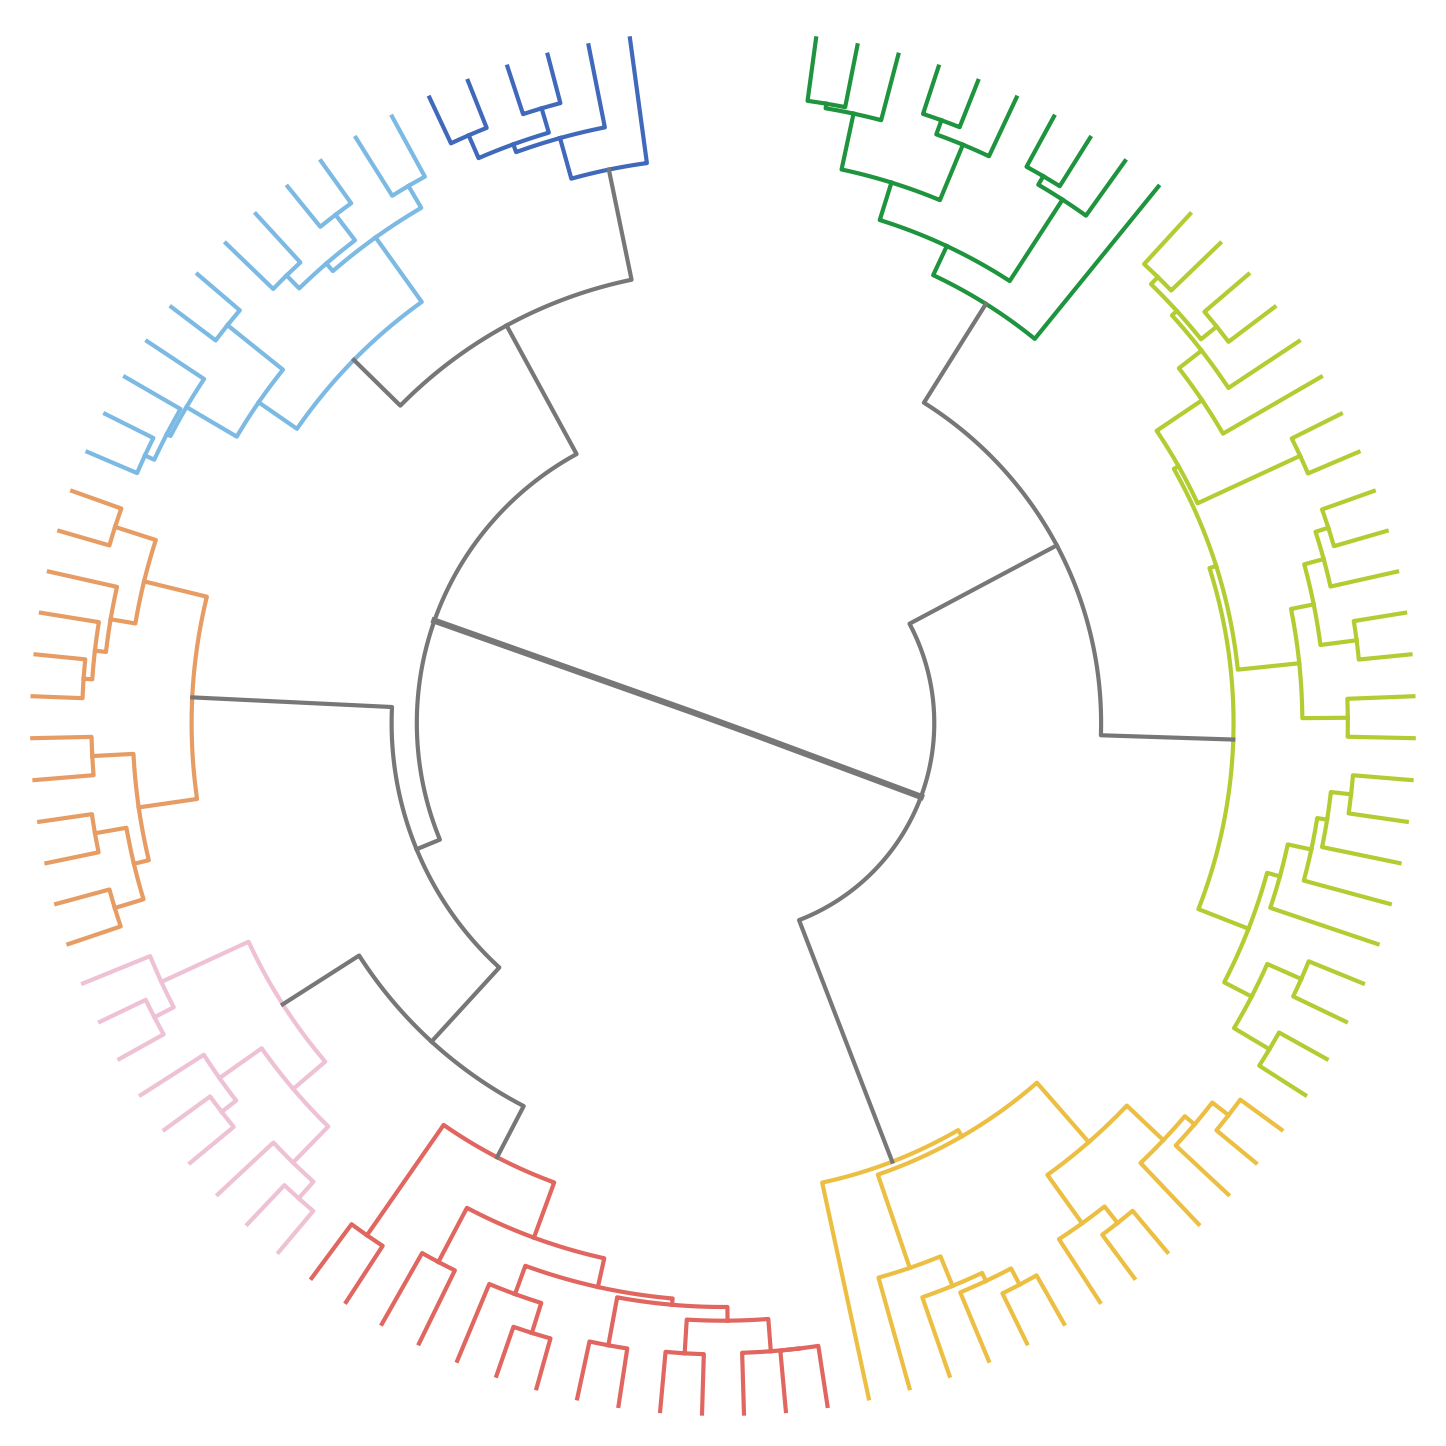

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111, polar=True)

icoord = np.array(d["icoord"])
dcoord = np.array(d["dcoord"])
gap = 0.043

dcoord = -dcoord
# avoid a wedge over the radial labels
imax = icoord.max()
imin = icoord.min()
icoord = ((icoord - imin) / (imax - imin) * (1 - gap) + gap / 2) * 2 * np.pi

for xs, ys, color in zip(icoord[:-1], dcoord[:-1], d["color_list"][:-1]):
    xs = smoothsegment(xs)
    ys = smoothsegment(ys)
    ax.plot(xs, ys, color=color, linewidth=1)


ax.plot(icoord[-1], dcoord[-1], color=d["color_list"][-1])

ax.spines["polar"].set_visible(False)
ax.set_rlabel_position(0)
Nxticks = 10
xticks = np.linspace(gap / 2, 1 - gap / 2, Nxticks)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])

ax.grid(False, axis="x")
ax.set_theta_zero_location("N")
# plt.savefig('../data/tree.svg')